In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap


#Please change file path as appropriate
df_ind_cities = pd.read_csv ("../Indian_cities.csv")
print(df_ind_cities.info())
print(df_ind_cities.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
name_of_city                      493 non-null object
state_code                        493 non-null int64
state_name                        493 non-null object
dist_code                         493 non-null int64
population_total                  493 non-null int64
population_male                   493 non-null int64
population_female                 493 non-null int64
0-6_population_total              493 non-null int64
0-6_population_male               493 non-null int64
0-6_population_female             493 non-null int64
literates_total                   493 non-null int64
literates_male                    493 non-null int64
literates_female                  493 non-null int64
sex_ratio                         493 non-null int64
child_sex_ratio                   493 non-null int64
effective_literacy_rate_total     493 non-null float64
effective_literacy_rate_male      493 non-n

In [2]:
# We cans see top 10 cities with most population
print("The Top 10 Cities Descending Order of Total Population")
top_pop_cities = df_ind_cities.sort_values(by='population_total',ascending=False)
top10_pop_cities=top_pop_cities.head(10)
top10_pop_cities

The Top 10 Cities Descending Order of Total Population


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,1845974,986,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,1682088,899,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,1416640,758,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,1195486,945,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,990584,898,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041


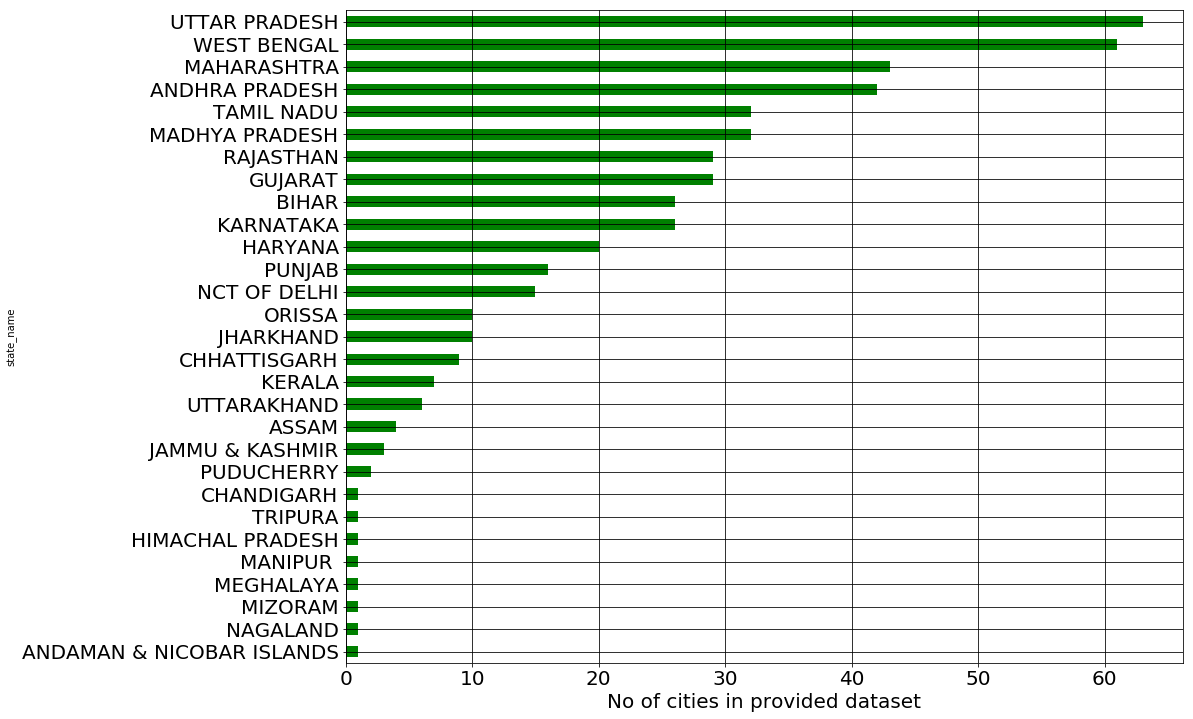

In [3]:
#We can see maximum cities from UP, WB
plt.figure(figsize=(15,12))
states = df_ind_cities.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities in provided dataset', fontsize = 20)
plt.show()

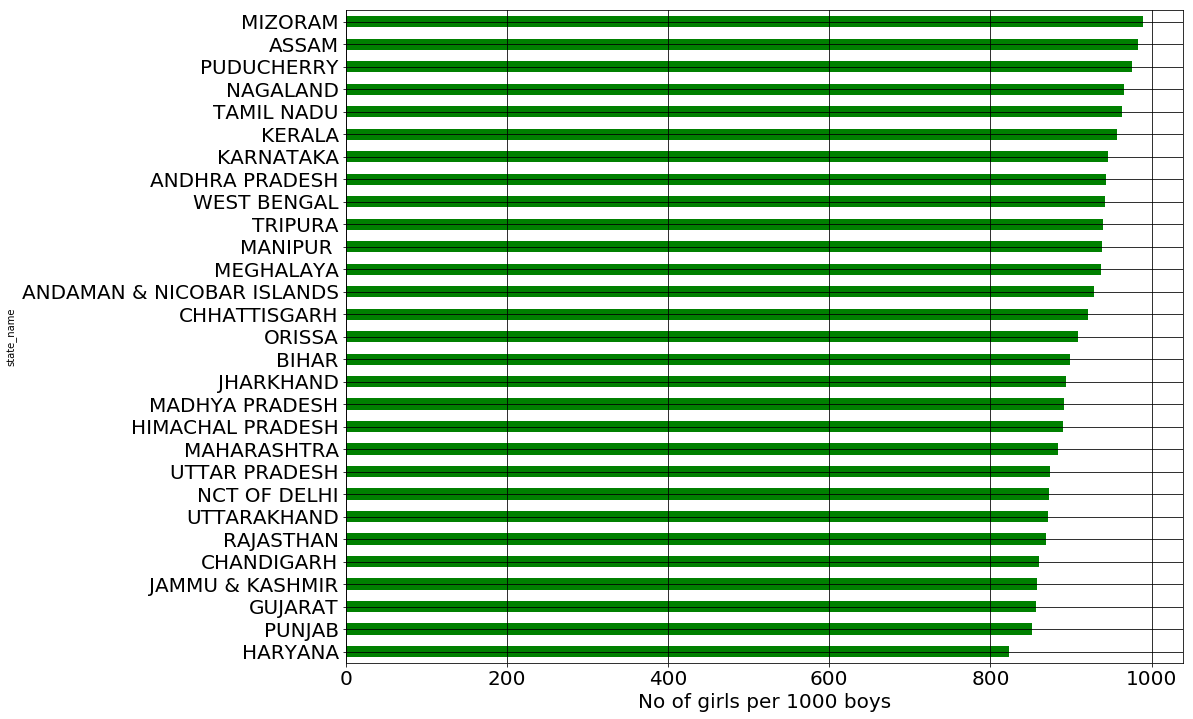

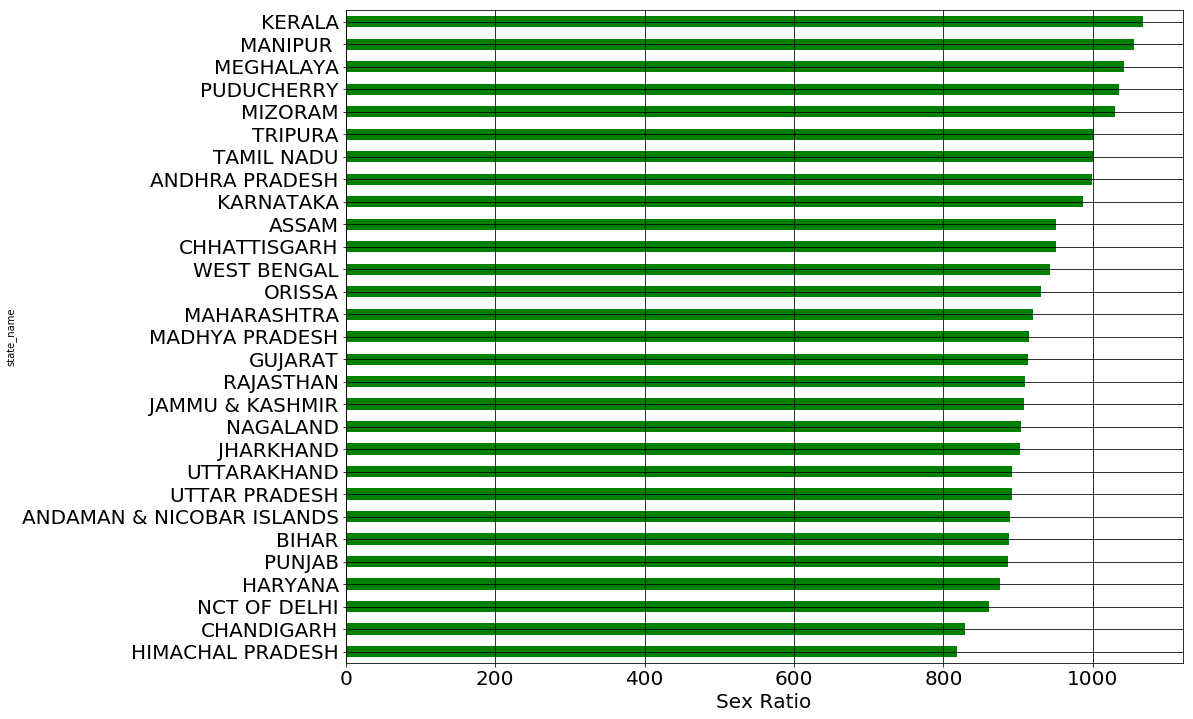

In [4]:
#Haryana is notorious for female infanticide, lets see if data supoorts this
#The graph does show Haryana at the bottom

plt.figure(figsize=(15,12))
states = df_ind_cities.groupby('state_name')['child_sex_ratio'].mean().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of girls per 1000 boys', fontsize = 20)
plt.show ()

plt.figure(figsize=(15,12))
states = df_ind_cities.groupby('state_name')['sex_ratio'].mean().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Sex Ratio', fontsize = 20)
plt.show ()

       name_of_city     state_name              location
count           493            493                   493
unique          492             29                   490
top     Aurangabad   UTTAR PRADESH  26.449923,80.3318736
freq              2             63                     2


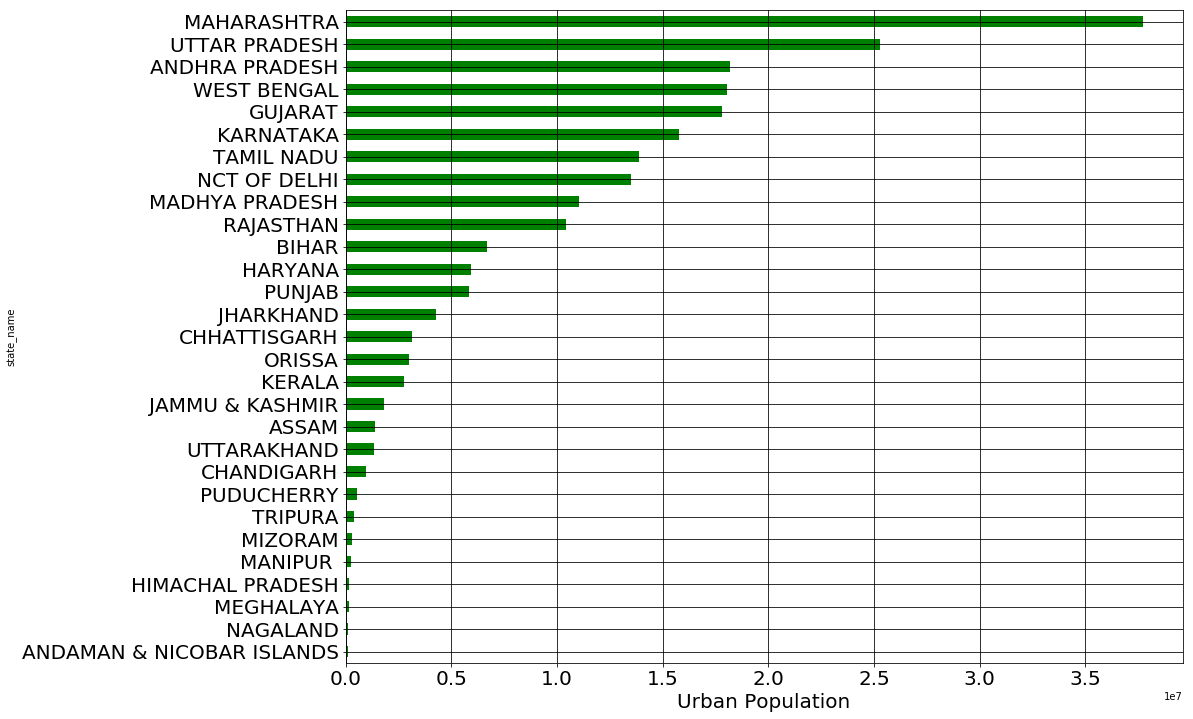

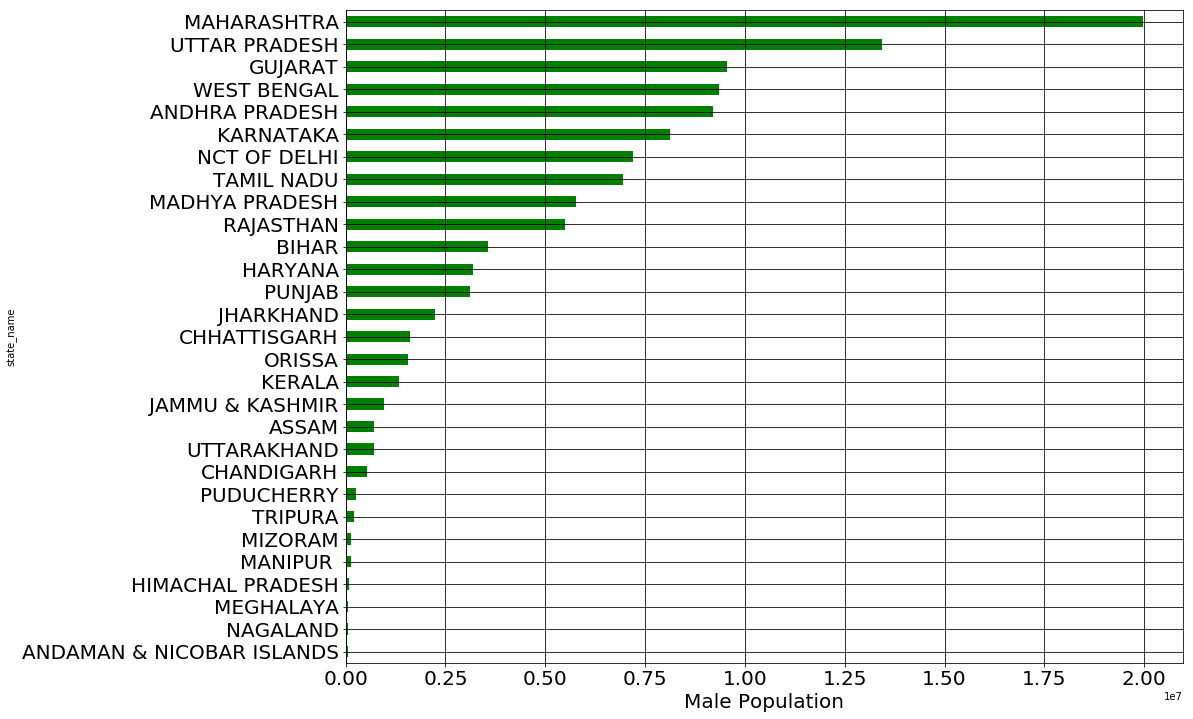

In [5]:
# We can see 2 Aurangabad one in Bihar, one in Maharashtra. Max cities from UP, no Null values
print (df_ind_cities.describe(include=['O']))

#We can see States with highest urban population as Maharashtra, UP ans AP (as data is City wise where city implies urban area)
plt.figure(figsize=(15,12))
states = df_ind_cities.groupby('state_name')['population_total'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Urban Population', fontsize = 20)
plt.show ()

#We can see States with highest male urban population as Maharashtra

plt.figure(figsize=(15,12))
states = df_ind_cities.groupby('state_name')['population_male'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Male Population', fontsize = 20)
plt.show ()

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


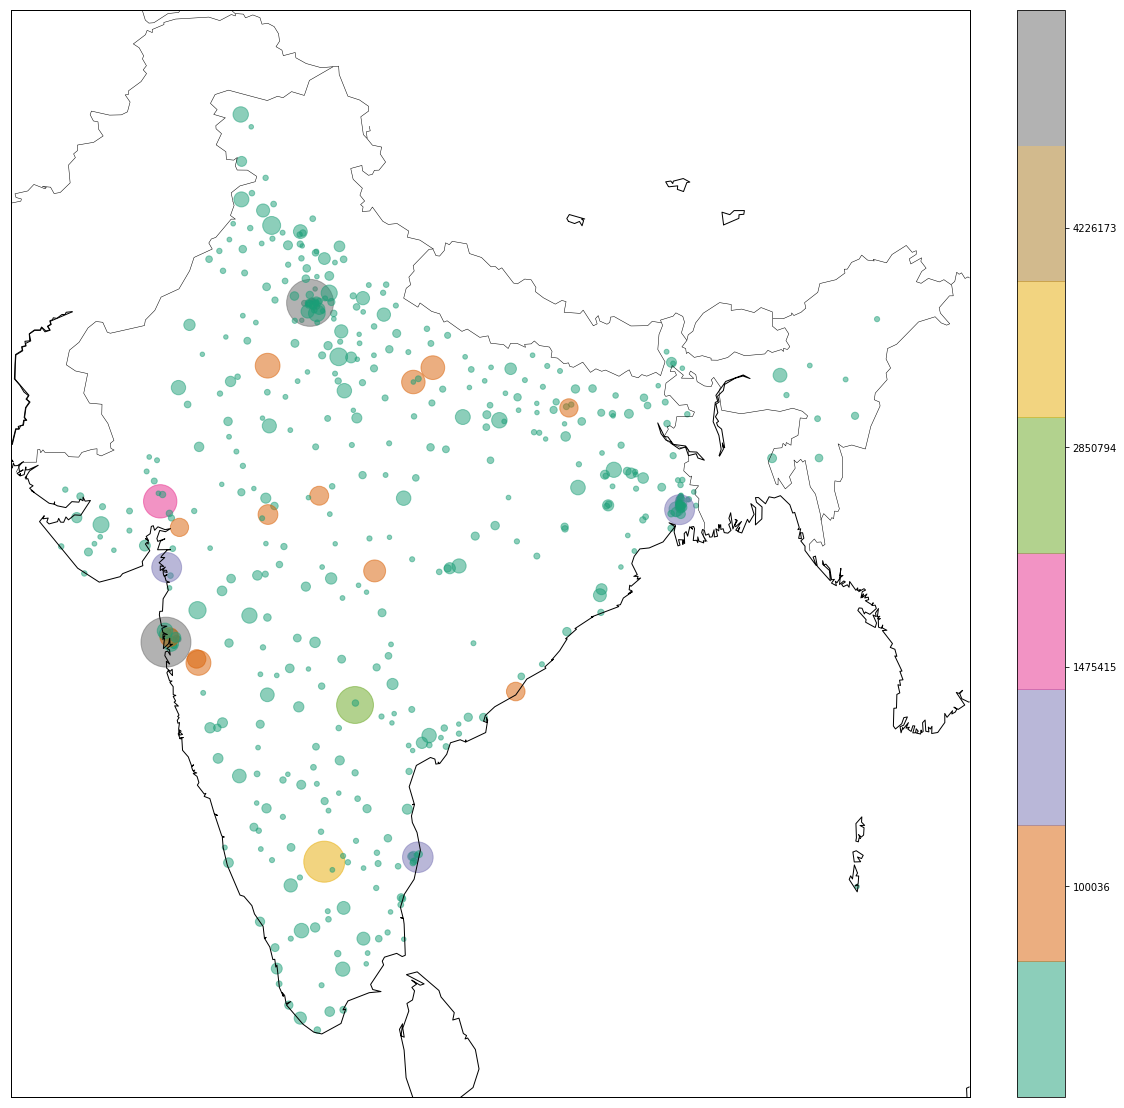

In [6]:
def plot_map(sizes, colorbarValue):

    plt.figure(figsize=(19,20))
    f, ax = plt.subplots(figsize=(19, 20))

    # Setting up Basemap
    map = Basemap(width=5000000, height=3500000, resolution='l', projection='aea', llcrnrlon=69,
                  llcrnrlat=6, urcrnrlon=99, urcrnrlat=36, lon_0=78, lat_0=20, ax=ax)
                  
    map.drawmapboundary()
    map.drawcountries()
    map.drawcoastlines()    
    
    x, y = map(np.array(df_ind_cities["longitude"]), np.array(df_ind_cities["latitude"]))
    cs = map.scatter(x, y, s=sizes, marker="o", c=sizes, cmap=cm.Dark2, alpha=0.5)
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorbarValue)
    
    plt.show()

# Plotting the states with highest male population on the map
df_ind_cities['latitude'] = df_ind_cities['location'].apply(lambda x: x.split(',')[0])
df_ind_cities['longitude'] = df_ind_cities['location'].apply(lambda x: x.split(',')[1])

    
population_sizes = df_ind_cities["population_total"].apply(lambda x: int(x / 5000))
colorbarValue = np.linspace(df_ind_cities["population_total"].min(), df_ind_cities["population_total"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(population_sizes, colorbarValue)

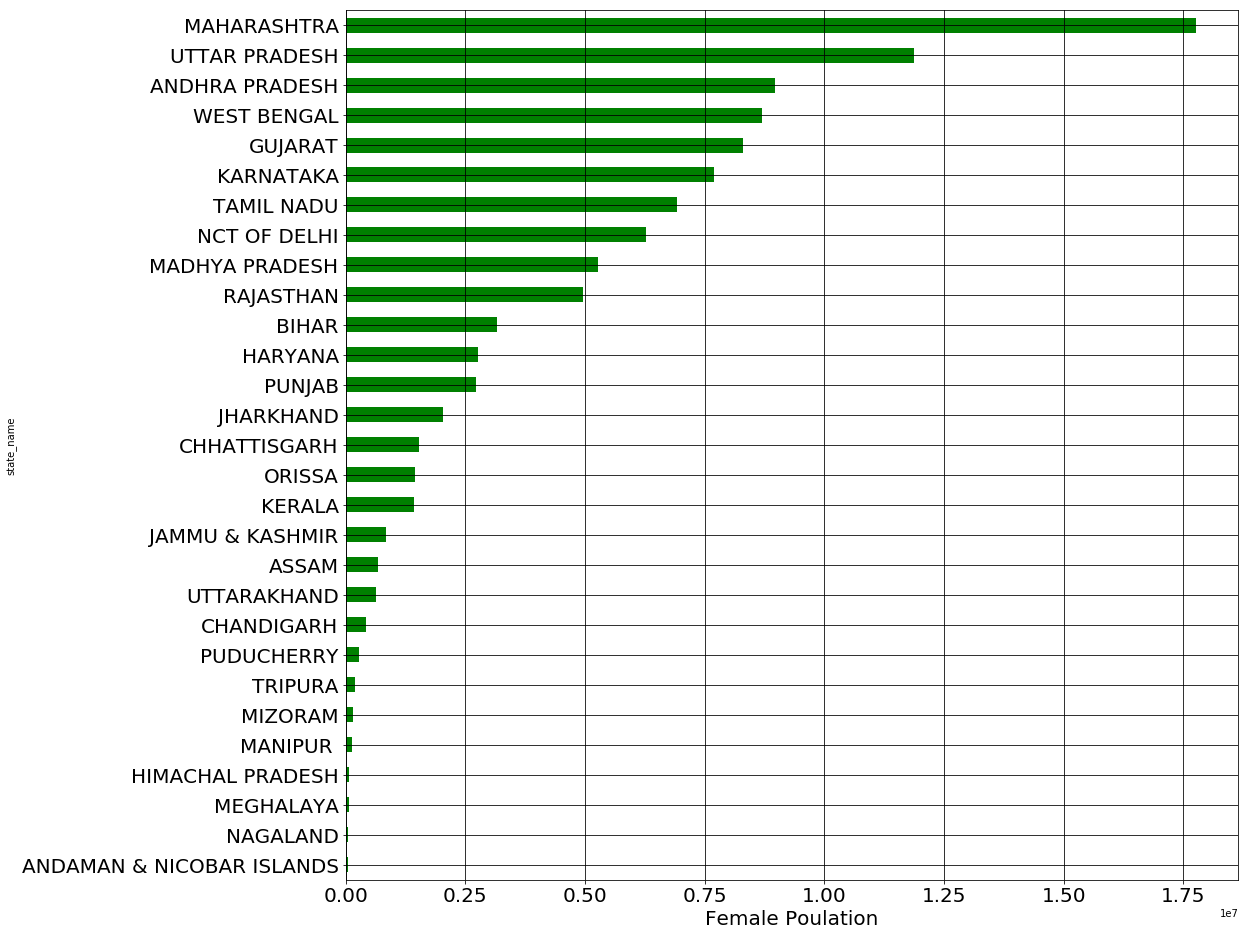

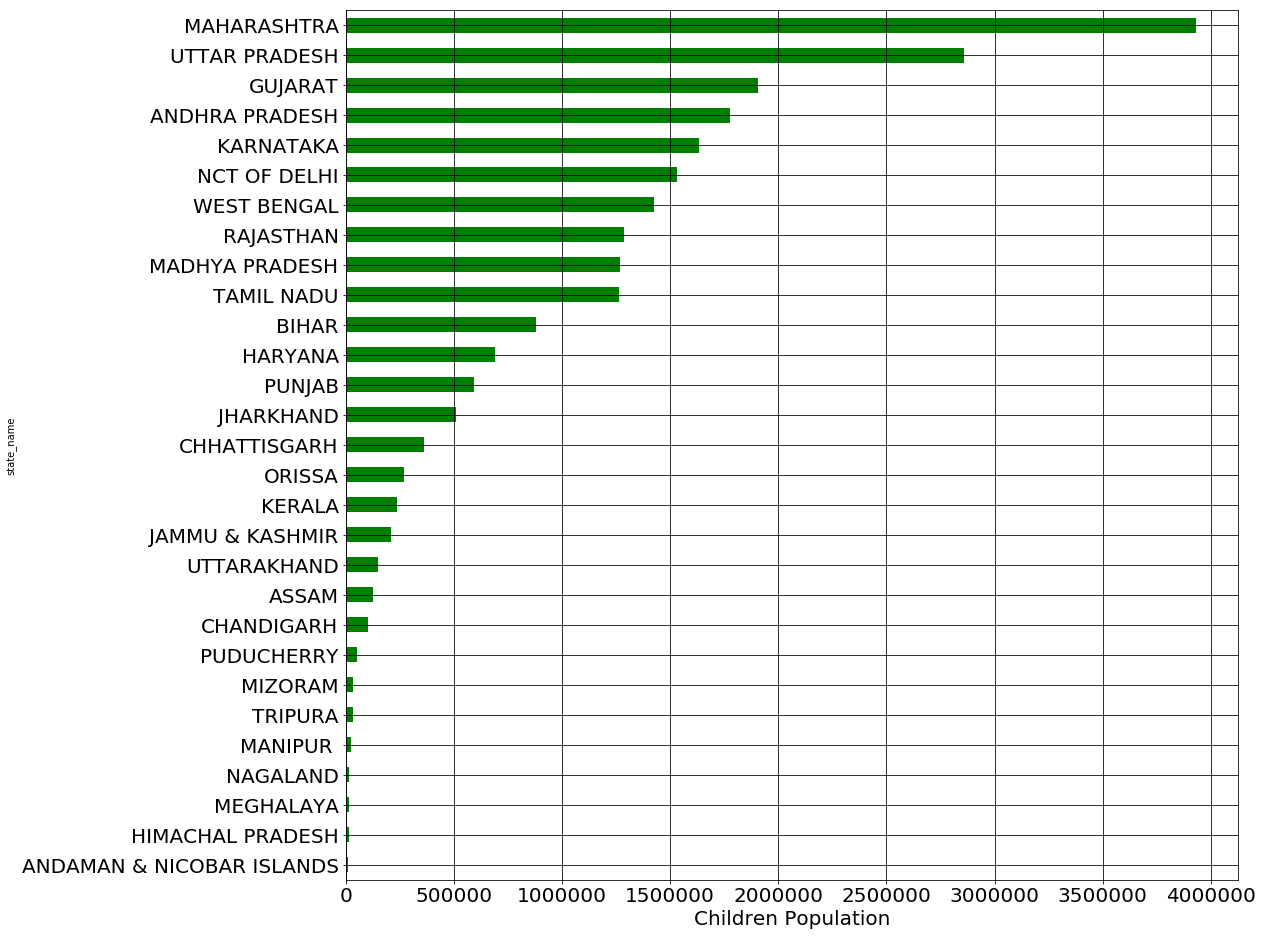

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


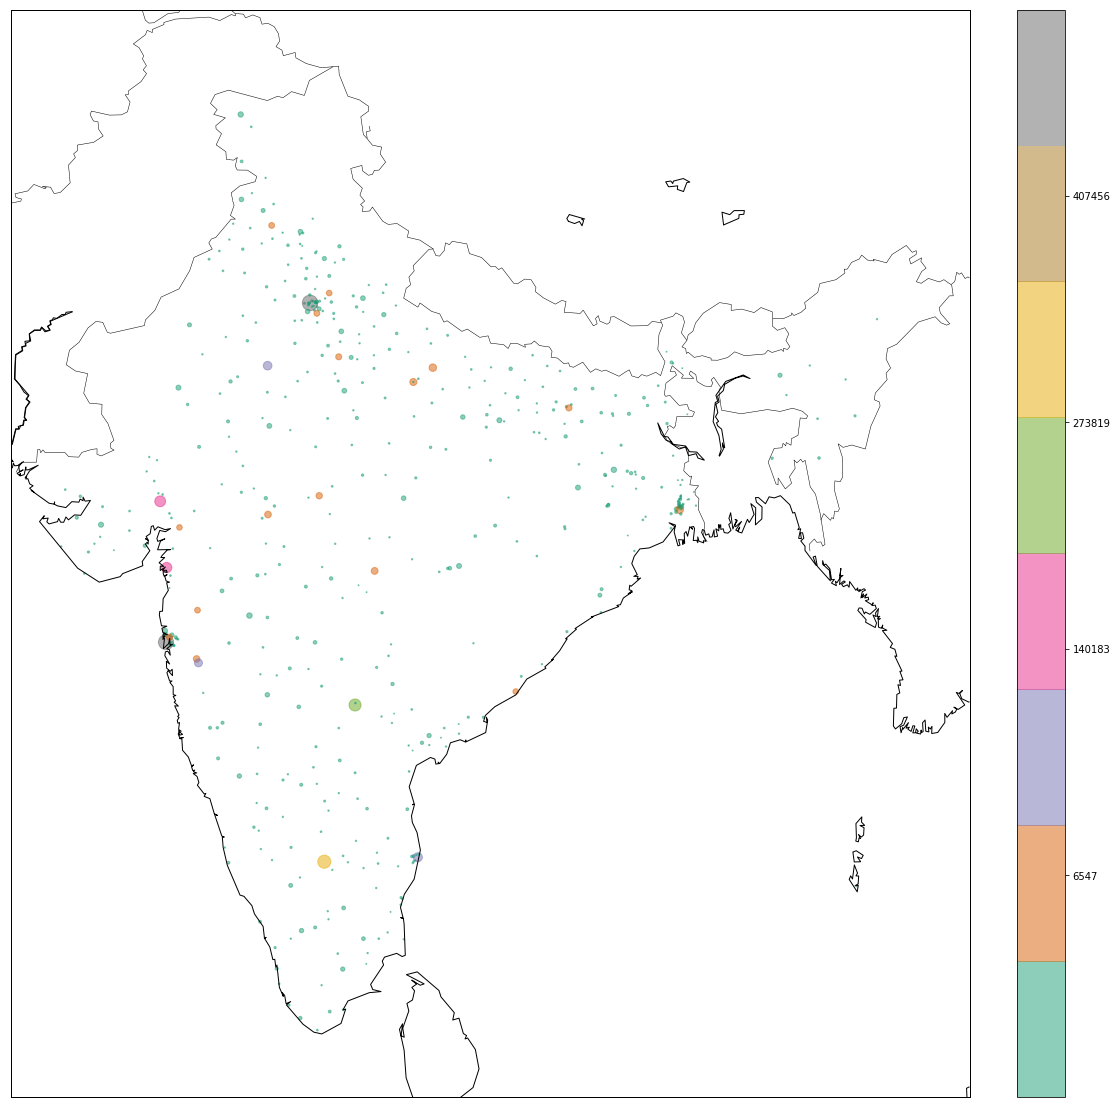

In [7]:
#We can see states with highest female population

plt.figure(figsize=(16,16))
states = df_ind_cities.groupby('state_name')['population_female'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Female Poulation', fontsize = 20)
plt.show ()

#We can see States with highest children population (0-6)

plt.figure(figsize=(16,16))
states = df_ind_cities.groupby('state_name')['0-6_population_total'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20, color = "green")
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('Children Population', fontsize = 20)
plt.show ()

population_sizes = df_ind_cities["0-6_population_total"].apply(lambda x: int(x / 5000))
colorbarValue = np.linspace(df_ind_cities["0-6_population_total"].min(), df_ind_cities["0-6_population_total"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(population_sizes, colorbarValue)

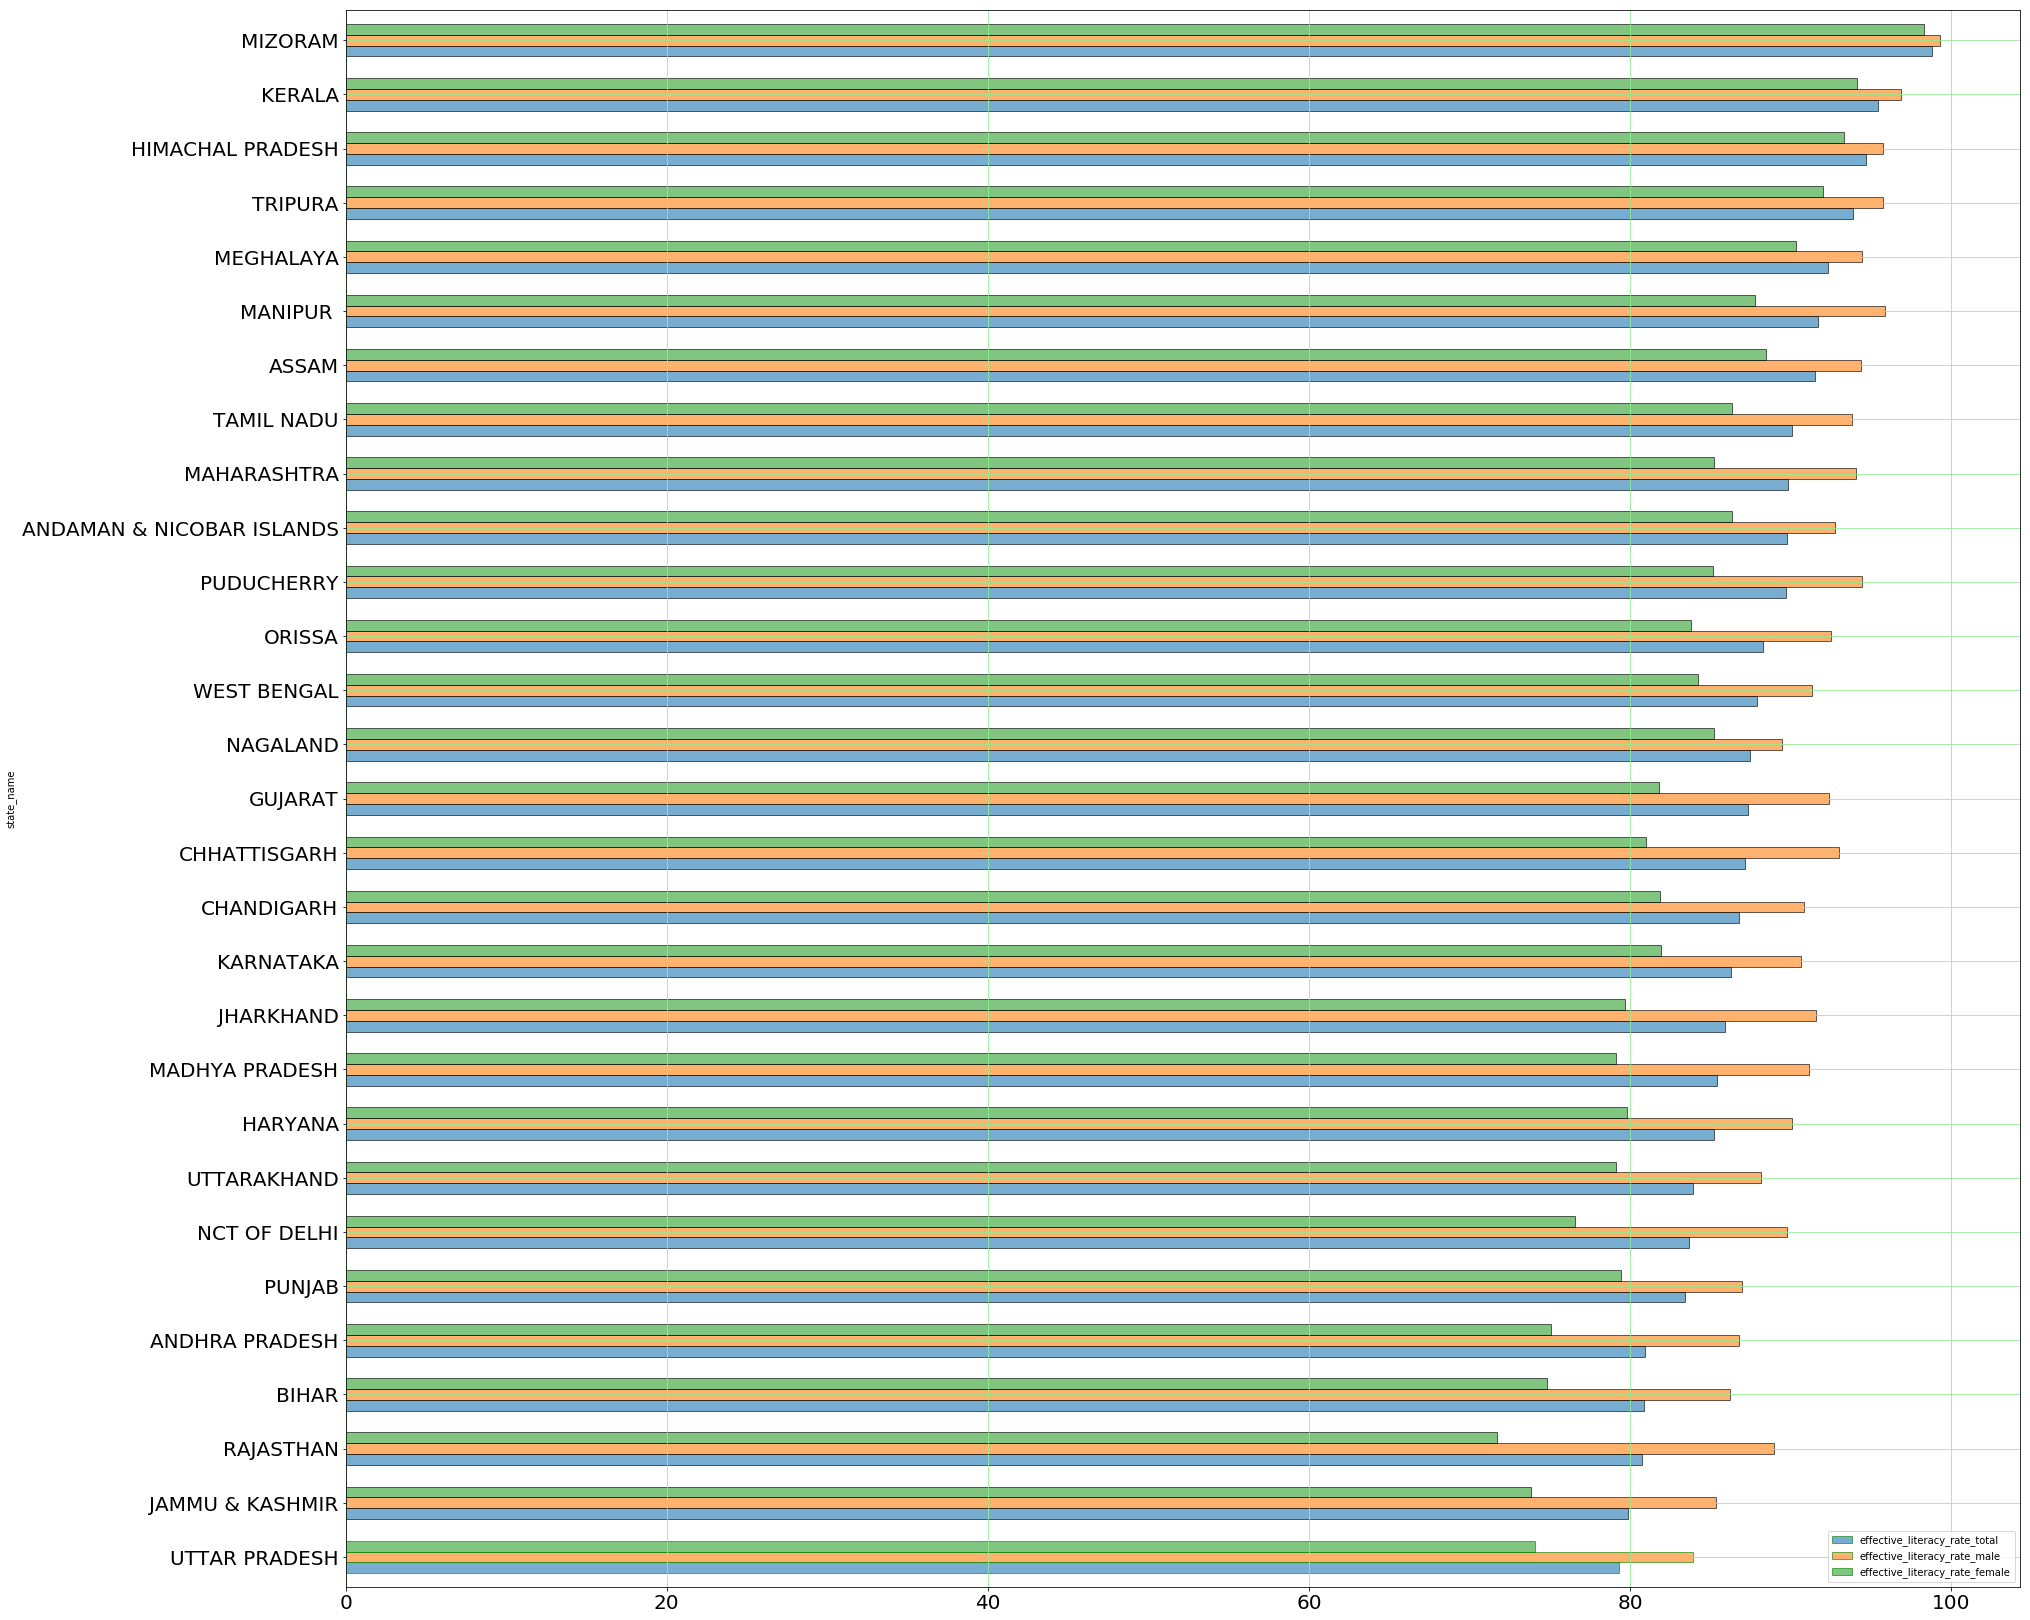

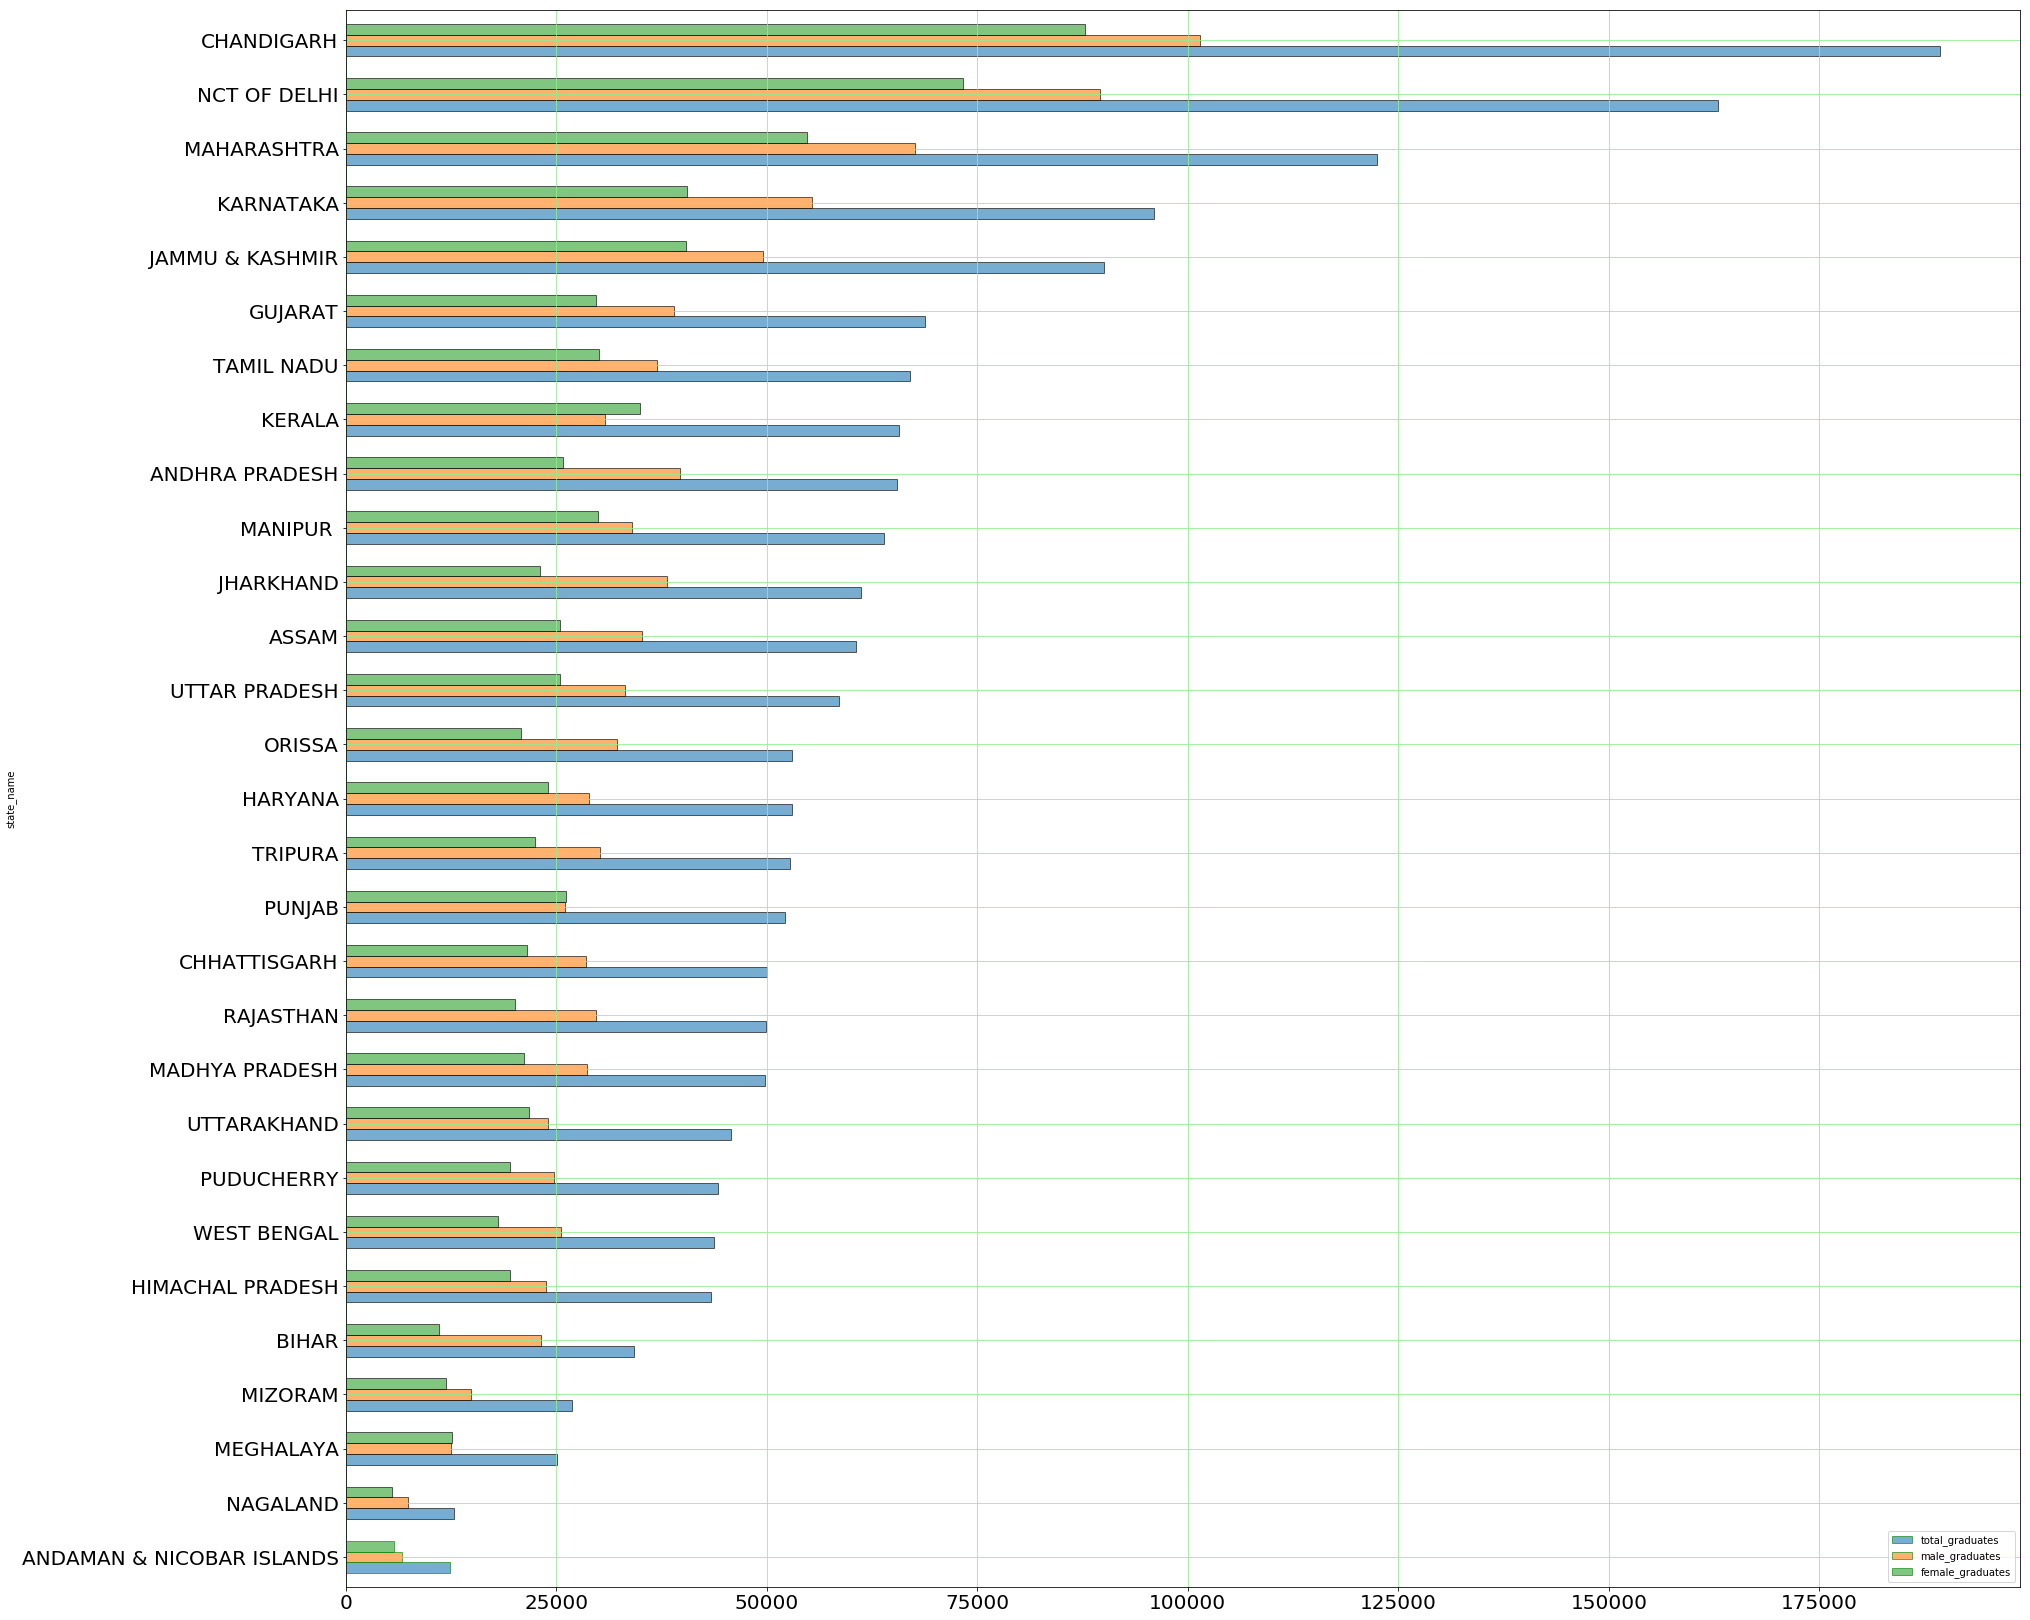

In [8]:
#Analysing the effective Literacy rates
#As expected Kerala is in top 3
state_literacy_effective = df_ind_cities[["state_name",
                                          "effective_literacy_rate_total",
                                          "effective_literacy_rate_male",
                                          "effective_literacy_rate_female"]].groupby("state_name").agg({"effective_literacy_rate_total":np.average,
                                                                                                "effective_literacy_rate_male":np.average,
                                                                                                "effective_literacy_rate_female":np.average})
state_literacy_effective.sort_values("effective_literacy_rate_total", ascending=True).plot(kind="barh",
                      grid=True,
                      figsize=(30,29),
                      alpha = 0.6,
                      width=0.6,
                      stacked = False,
                      edgecolor="g",
                      fontsize = 20)
plt.grid(b=True, which='both', color='lightGreen',linestyle='-')
plt.show ()

#Analysing graduates accross states
#Kerala and Meghalaya are the only states that have more number of female graduates than 
# male graduates
state_graduates  = df_ind_cities[["state_name",
                                  "total_graduates",
                                  "male_graduates",
                                  "female_graduates"]].groupby("state_name").agg({"total_graduates":np.average,
                                                                                  "male_graduates":np.average,
                                                                                  "female_graduates":np.average})
# Plotting the bar chart 
state_graduates.sort_values("total_graduates", ascending=True).plot(kind="barh",
                      grid=True,
                      figsize=(30,29),
                      alpha = 0.6,
                      width=0.6,
                      stacked = False,
                      edgecolor="g",
                      fontsize = 20)
plt.grid(b=True, which='both', color='lightGreen',linestyle='-')
plt.show ()